Project Overview and Introduction

This notebook is part of my data science project, which aims to predict whether a patient will be admitted within 30 days or not. The primary goal is to build a predictive model using machine learning techniques.

IMPOTING PACKAGES

In [390]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler



DATA IMPORTING

In [391]:
#IMPORTING THE DATA 
db=pd.read_csv('hospital_readmissions.csv')
db

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,Normal,No
996,997,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,Normal,No
997,998,75,Male,Urgent,Diabetes,29,13,3,1,4,8,Normal,No
998,999,46,Other,Elective,Injury,19,20,1,4,4,1,Abnormal,No


DATA EXPLORING

In [392]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [393]:
db.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,51.665000,50.836000,15.661000,2.016000,2.019000,1.956000,5.011000
std,288.819436,21.989459,28.075137,8.230177,1.399894,1.416561,1.409983,2.664203
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000
50%,500.500000,50.500000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000
75%,750.250000,69.000000,75.000000,23.000000,3.000000,3.000000,3.000000,7.000000
max,1000.000000,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


In [394]:
#PATIENT ID IS NOT NEEDED FOR OUR PREDICTION SO DROPING IT 
db=db.drop(columns=['Patient_ID'],axis=1)
db.columns

Index(['Age', 'Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'A1C_Result', 'Readmitted'],
      dtype='object')

DATA CLEANING

In [395]:
#CHECKING NULL VALUES FOUND 434 NULL VALUES IN A1C_RESULT WHICH IS CATEGORICAL VALUE 
db.isnull().sum()

Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

In [396]:
#CHECKING DUPLICATES 
db.duplicated().sum()


0

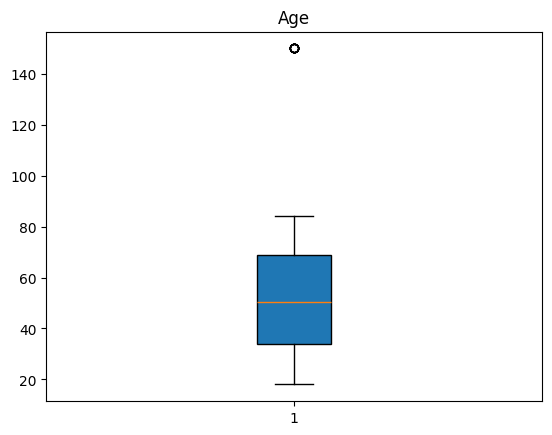

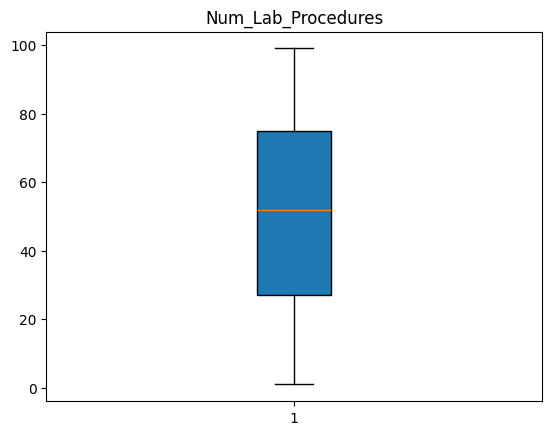

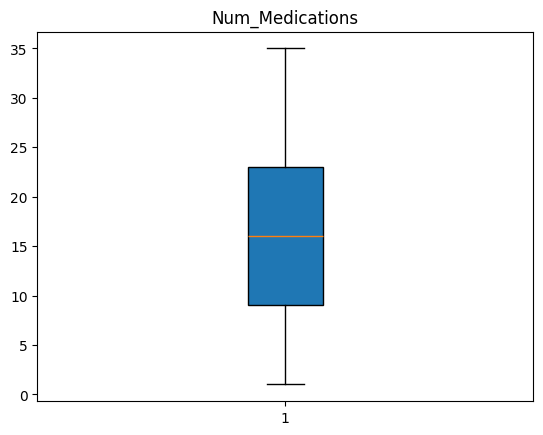

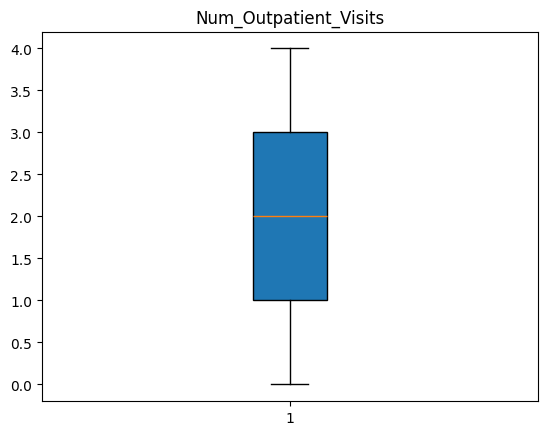

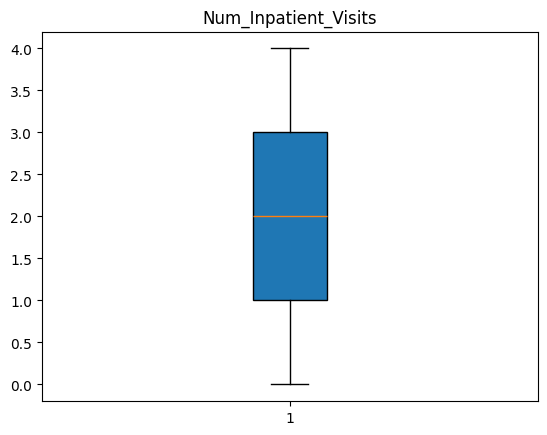

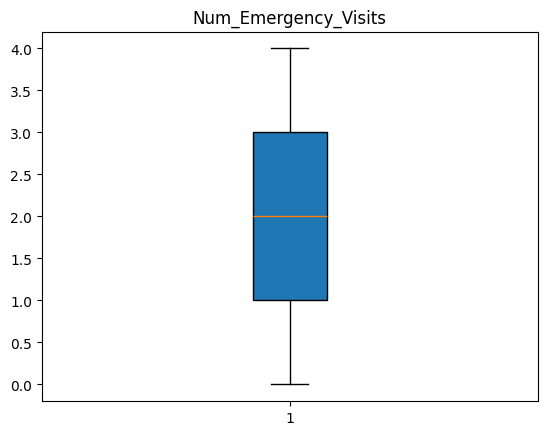

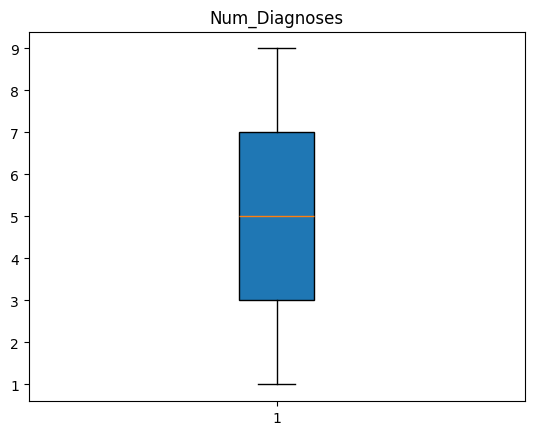

In [397]:
# TO FIND OUTLAYERS 
numeric_columns = db.select_dtypes(include=[int, float]).columns

for column in numeric_columns:
    plt.boxplot(db[column],patch_artist=True)
    plt.title(column)
    plt.show()

IQR

In [398]:
#USING IQR METHOD TO REMOVE  OUTLAYERS 
Q1=db['Age'].quantile(.25)
Q3=db['Age'].quantile(.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outlayer=(db['Age']<lower)|(db['Age']>upper)
db[~outlayer]
db=db[~outlayer]


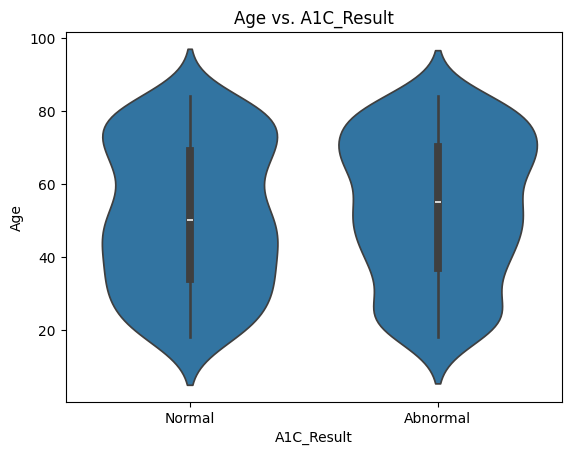

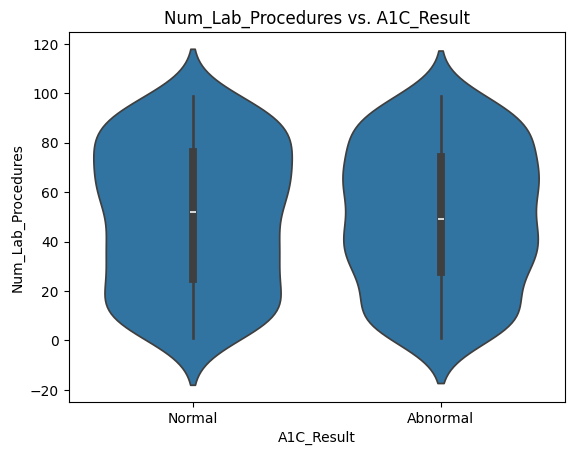

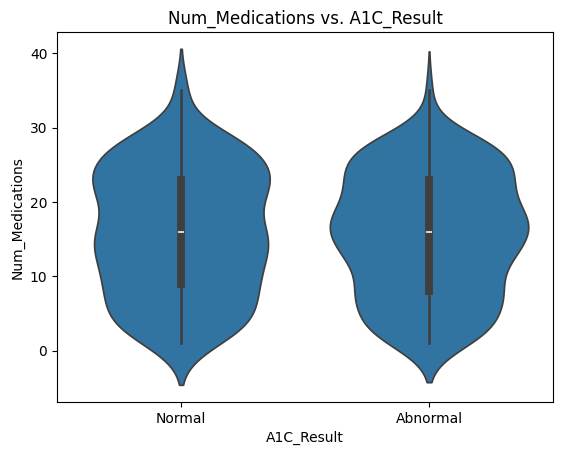

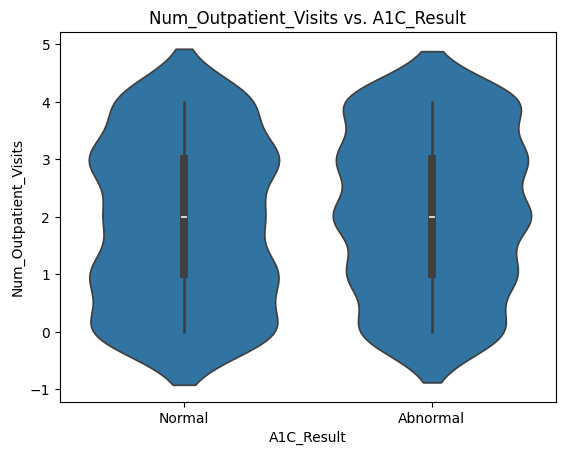

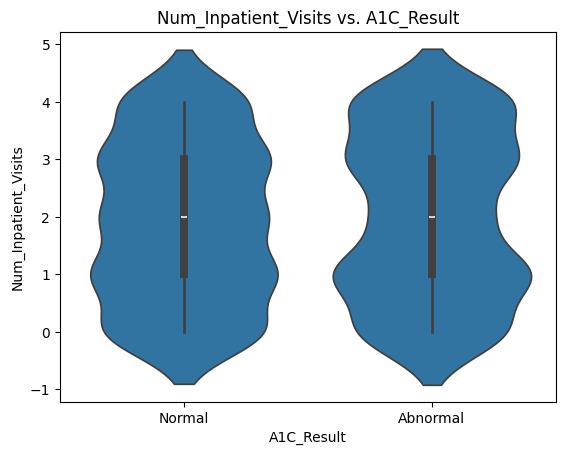

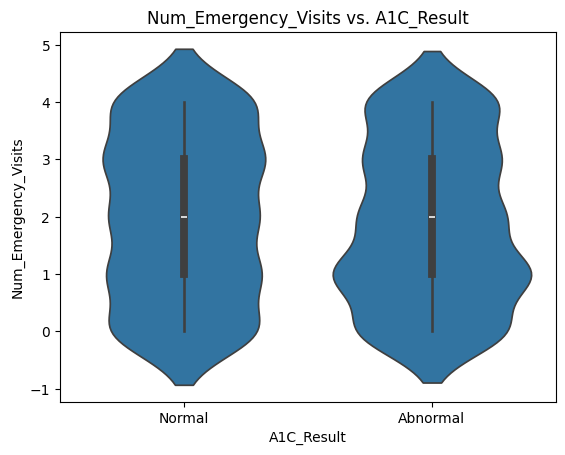

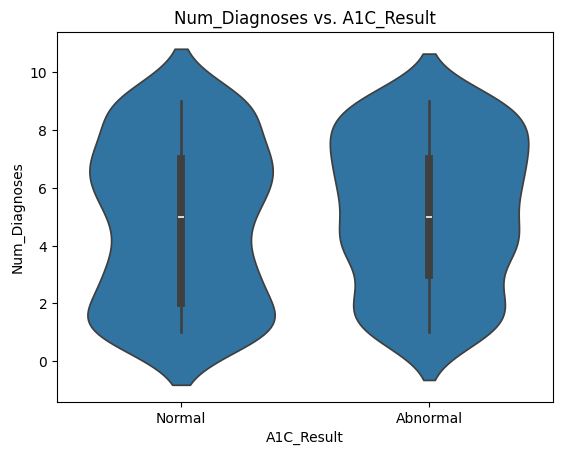

In [399]:
# DISTIBUTION OF NUMERIC VALUES DEPENDING ON THE A1C RESULT
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming db is your DataFrame
db_filtered = db.dropna(subset=['A1C_Result'])

numeric_columns = ['Age', 'Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits',
                   'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses']

# plt.figure(figsize=(10, 8))
for column in numeric_columns:
    sns.violinplot(x='A1C_Result', y=column, data=db_filtered)
    plt.title(f'{column} vs. A1C_Result')
    plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\2113201137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b['Age_Group'] = pd.cut(db_b['Age'], bins=age_bins)


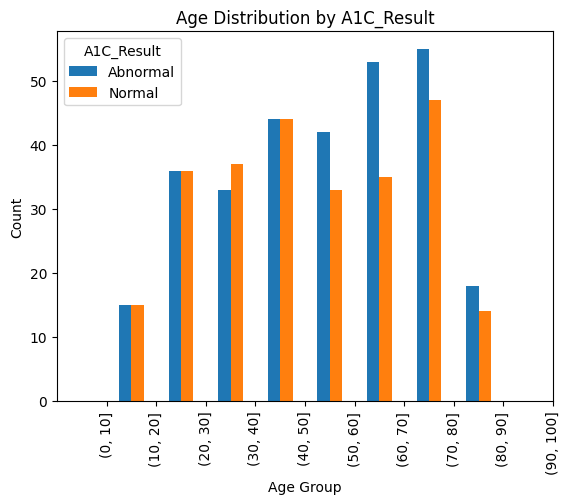

In [400]:
# A1C_RESULT has missing values it has some solution 1.droping the null values 2. using statistical method 3.using classification model 4. drpping the column
db_b=db.dropna()
# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Assign age bins to a new column 'Age_Group'
db_b['Age_Group'] = pd.cut(db_b['Age'], bins=age_bins)

# Create a DataFrame for plotting
plot_data = db_b.groupby(['Age_Group', 'A1C_Result']).size().unstack()

# Plot a stacked bar plot with bars side by side
plot_data.plot(kind='bar', stacked=False, position=1.5)
plt.title('Age Distribution by A1C_Result')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\1264240615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b['Num_Lab_Procedures'] = pd.cut(db_b['Num_Lab_Procedures'], bins=Num_Lab_bins)


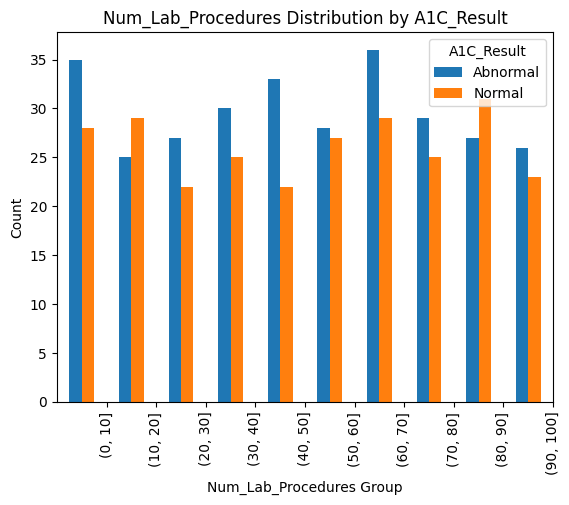

In [401]:
# Create Num_Lab_Procedures bins
Num_Lab_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Assign Num_Lab_Procedures bins to a new column 'Num_Lab_Procedures'
db_b['Num_Lab_Procedures'] = pd.cut(db_b['Num_Lab_Procedures'], bins=Num_Lab_bins)

# Create a DataFrame for plotting
plot_data = db_b.groupby(['Num_Lab_Procedures', 'A1C_Result']).size().unstack()

# Plot a stacked bar plot with bars side by side
plot_data.plot(kind='bar', stacked=False, position=1.5)
plt.title('Num_Lab_Procedures Distribution by A1C_Result')
plt.xlabel('Num_Lab_Procedures Group')
plt.ylabel('Count')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\2003114631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_b['Num_Medications'] = pd.cut(db_b['Num_Medications'], bins=Num_Medications_bins)


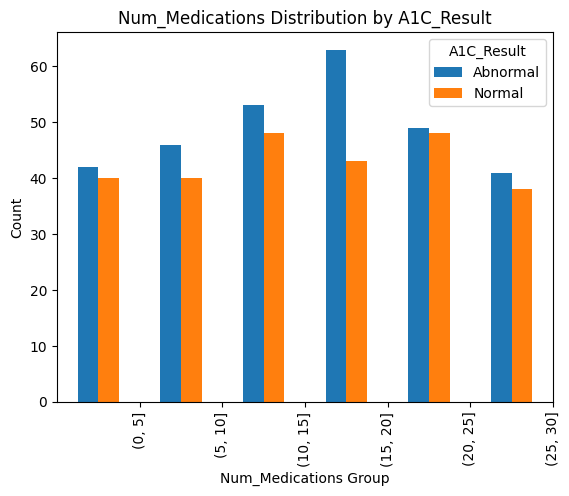

In [402]:
# Create Num_Medications bins
Num_Medications_bins = [0,5,10,15,20,25,30]

# Assign Num_Medications bins to a new column 'Num_Medications'
db_b['Num_Medications'] = pd.cut(db_b['Num_Medications'], bins=Num_Medications_bins)

# Create a DataFrame for plotting
plot_data = db_b.groupby(['Num_Medications', 'A1C_Result']).size().unstack()

# Plot a stacked bar plot with bars side by side
plot_data.plot(kind='bar', stacked=False, position=1.5)
plt.title('Num_Medications Distribution by A1C_Result')
plt.xlabel('Num_Medications Group')
plt.ylabel('Count')
plt.show()

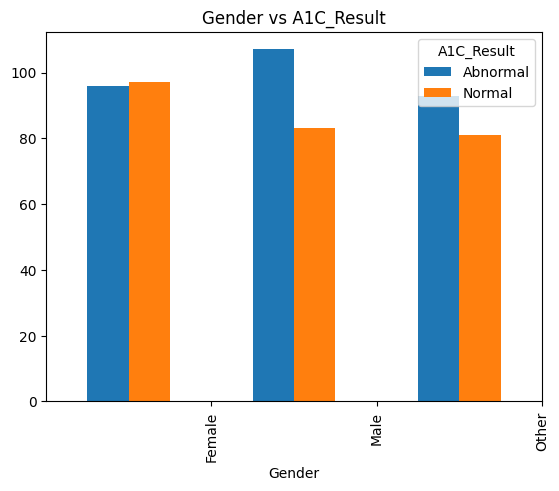

In [403]:
#GENDER AND A1C RESULT 
plto_age=db_b.groupby(['Gender','A1C_Result']).size().unstack()
plto_age.plot(kind='bar',stacked=False, position=1.5)
plt.title('Gender vs A1C_Result')
plt.show()

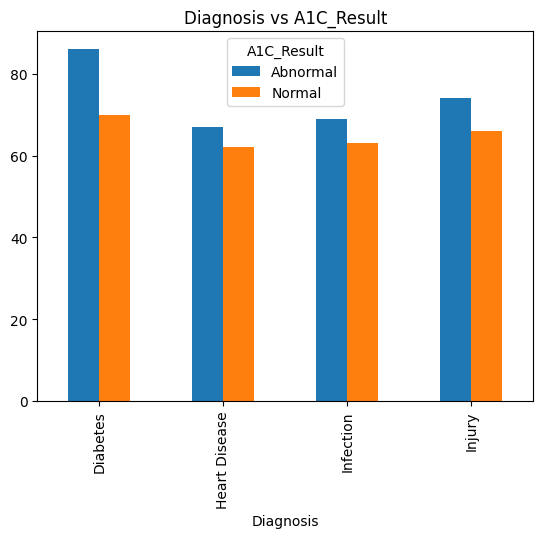

In [404]:
#DIAGNOSIS AND A1C RESULT 
plt_Diagnosis=db_b.groupby(['Diagnosis','A1C_Result']).size().unstack()
plt_Diagnosis.plot(kind='bar',stacked=False)
plt.title('Diagnosis vs A1C_Result')
plt.show()

removing A1C_Result

In [405]:
ndb_A1=db.drop(columns='A1C_Result',axis=1)
ndb_A1

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted
0,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Yes
1,32,Female,Urgent,Diabetes,81,10,4,4,1,6,No
2,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,No
3,38,Male,Elective,Diabetes,77,11,2,3,4,9,Yes
4,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,No
996,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,No
997,75,Male,Urgent,Diabetes,29,13,3,1,4,8,No
998,46,Other,Elective,Injury,19,20,1,4,4,1,No


In [406]:
#SEPERATING CATEGORICAL VALUES 
c=ndb_A1.select_dtypes(include='object')
# c.columns
# one_heart=['Gender', 'Admission_Type', 'Diagnosis']
# label=['Readmitted']
col=c.drop(columns=['Readmitted'],axis=1)



In [407]:
#USNIG ONE HEART ENCODING 
db_tar=c['Readmitted']
db_non_tar = c.drop(columns='Readmitted', axis=1)
db_columns = db_non_tar.columns

for i in db_columns:
    db_non_tar = pd.get_dummies(db_non_tar, columns=[i], prefix=f'Category_{i}')

db_non_tar


,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury
0,False,False,True,False,True,False,False,True,False,False
1,True,False,False,False,False,True,True,False,False,False
2,True,False,False,False,False,True,False,True,False,False
3,False,True,False,True,False,False,True,False,False,False
4,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False
996,True,False,False,False,True,False,False,True,False,False
997,False,True,False,False,False,True,True,False,False,False
998,False,False,True,True,False,False,False,False,False,True


In [408]:
# LABEL ENCODING FOR READMITTED COLUMN 
Lable=LabelEncoder()
c['Readmitted']=Lable.fit_transform(c['Readmitted'])
d=c['Readmitted']

In [409]:
#NOW CONCATTING THE COLUMNS INTO A SINGLE DATA FRAME 
db_en=pd.concat([db_non_tar,d],axis=1)
db_en

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted
0,False,False,True,False,True,False,False,True,False,False,1
1,True,False,False,False,False,True,True,False,False,False,0
2,True,False,False,False,False,True,False,True,False,False,0
3,False,True,False,True,False,False,True,False,False,False,1
4,True,False,False,False,False,True,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0
996,True,False,False,False,True,False,False,True,False,False,0
997,False,True,False,False,False,True,True,False,False,False,0
998,False,False,True,True,False,False,False,False,False,True,0


In [410]:
e=db['A1C_Result']
db_en=pd.concat([db_en,e],axis=1)
db_en

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result
0,False,False,True,False,True,False,False,True,False,False,1,NaN
1,True,False,False,False,False,True,True,False,False,False,0,NaN
2,True,False,False,False,False,True,False,True,False,False,0,Normal
3,False,True,False,True,False,False,True,False,False,False,1,NaN
4,True,False,False,False,False,True,True,False,False,False,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,Normal
996,True,False,False,False,True,False,False,True,False,False,0,Normal
997,False,True,False,False,False,True,True,False,False,False,0,Normal
998,False,False,True,True,False,False,False,False,False,True,0,Abnormal


In [411]:
db_num=db.select_dtypes(include=[int,float])
db_en=pd.concat([db_num,db_en],axis=1)


In [412]:
full_n=db_en.dropna()
full_n

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result
2,78,75,29,4,0,3,5,True,False,False,False,False,True,False,True,False,False,0,Normal
7,70,28,19,4,0,3,7,True,False,False,True,False,False,False,True,False,False,1,Normal
8,19,70,23,1,2,4,6,False,True,False,False,False,True,False,False,True,False,0,Normal
9,47,41,24,4,0,0,3,False,True,False,False,True,False,False,False,False,True,0,Abnormal
11,19,68,14,2,4,2,5,True,False,False,False,True,False,False,False,False,True,0,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,68,10,2,3,2,9,True,False,False,False,True,False,False,True,False,False,0,Normal
996,43,61,7,0,4,0,1,True,False,False,False,True,False,False,True,False,False,0,Normal
997,75,29,13,3,1,4,8,False,True,False,False,False,True,True,False,False,False,0,Normal
998,46,19,20,1,4,4,1,False,False,True,True,False,False,False,False,False,True,0,Abnormal


label encoding on A1C result

In [413]:
full_n['A1C_Result']=Lable.fit_transform(full_n['A1C_Result'])
full_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 2 to 999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                557 non-null    int64
 1   Num_Lab_Procedures                 557 non-null    int64
 2   Num_Medications                    557 non-null    int64
 3   Num_Outpatient_Visits              557 non-null    int64
 4   Num_Inpatient_Visits               557 non-null    int64
 5   Num_Emergency_Visits               557 non-null    int64
 6   Num_Diagnoses                      557 non-null    int64
 7   Category_Gender_Female             557 non-null    bool 
 8   Category_Gender_Male               557 non-null    bool 
 9   Category_Gender_Other              557 non-null    bool 
 10  Category_Admission_Type_Elective   557 non-null    bool 
 11  Category_Admission_Type_Emergency  557 non-null    bool 
 12  Category_Admission_Type_Urg

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\284754654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_n['A1C_Result']=Lable.fit_transform(full_n['A1C_Result'])


Correlation

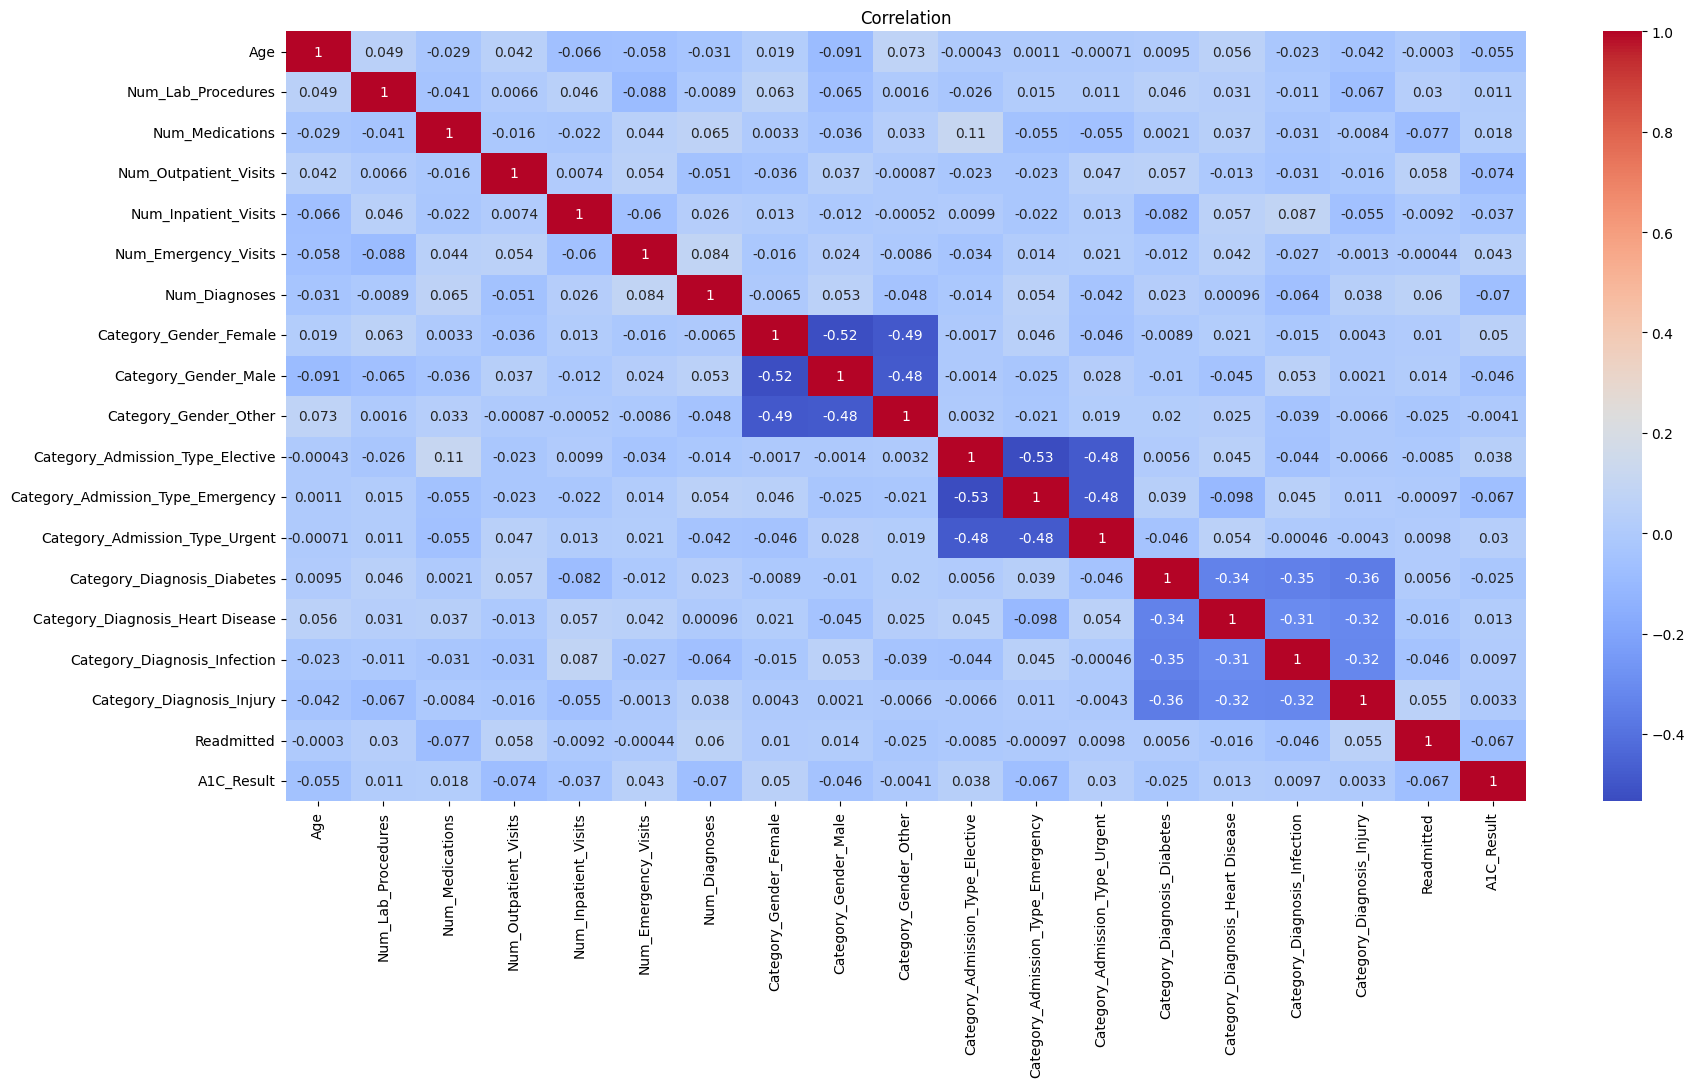

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full_n' is your DataFrame
corr = full_n.corr()

# Create a figure with a specific size
plt.figure(figsize=(20,10))

# Create a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Set the title
plt.title('Correlation')

# Show the plot
plt.show()


In [415]:
import pandas as pd

# Assuming your DataFrame is named full_n
# Extract the target variable
target_variable = full_n['A1C_Result']

# Calculate the correlation between the target variable and other columns
correlations = full_n.drop(columns=['A1C_Result']).corrwith(target_variable)

# Display the correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)
print("Correlations with A1C_Result:")
print(sorted_correlations)


Correlations with A1C_Result:
Num_Outpatient_Visits                0.073522
Num_Diagnoses                        0.069942
Category_Admission_Type_Emergency    0.067245
Readmitted                           0.067127
Age                                  0.054548
Category_Gender_Female               0.049626
Category_Gender_Male                 0.045765
Num_Emergency_Visits                 0.043077
Category_Admission_Type_Elective     0.038476
Num_Inpatient_Visits                 0.036542
Category_Admission_Type_Urgent       0.029814
Category_Diagnosis_Diabetes          0.024828
Num_Medications                      0.017884
Category_Diagnosis_Heart Disease     0.013244
Num_Lab_Procedures                   0.011182
Category_Diagnosis_Infection         0.009706
Category_Gender_Other                0.004139
Category_Diagnosis_Injury            0.003306
dtype: float64


SCALING

In [416]:
scaler=MinMaxScaler()
full_n['Age'] = scaler.fit_transform(full_n[['Age']])
full_n['Age']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\2834053608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_n['Age'] = scaler.fit_transform(full_n[['Age']])


2      0.909091
7      0.787879
8      0.015152
9      0.439394
11     0.015152
         ...   
995    0.045455
996    0.378788
997    0.863636
998    0.424242
999    0.545455
Name: Age, Length: 557, dtype: float64

In [417]:
full_n['Num_Lab_Procedures'] = scaler.fit_transform(full_n[['Num_Lab_Procedures']])
full_n['Num_Lab_Procedures'] 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\3271681421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_n['Num_Lab_Procedures'] = scaler.fit_transform(full_n[['Num_Lab_Procedures']])


2      0.755102
7      0.275510
8      0.704082
9      0.408163
11     0.683673
         ...   
995    0.683673
996    0.612245
997    0.285714
998    0.183673
999    0.428571
Name: Num_Lab_Procedures, Length: 557, dtype: float64

In [418]:
full_n['Num_Medications'] = scaler.fit_transform(full_n[['Num_Medications']])
full_n['Num_Medications']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\3010413672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_n['Num_Medications'] = scaler.fit_transform(full_n[['Num_Medications']])


2      0.823529
7      0.529412
8      0.647059
9      0.676471
11     0.382353
         ...   
995    0.264706
996    0.176471
997    0.352941
998    0.558824
999    0.794118
Name: Num_Medications, Length: 557, dtype: float64

SPLITNG DATASET TO TRAIN MODEL

In [419]:
x=full_n.drop(columns=['A1C_Result','Category_Admission_Type_Urgent','Num_Inpatient_Visits','Age','Category_Admission_Type_Elective','Category_Diagnosis_Diabetes','Category_Admission_Type_Emergency','Num_Emergency_Visits'],axis=1)
y=full_n['A1C_Result']

LOGISTIC REGRESSION FOR A1C_RESULT

In [420]:
# x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.1,random_state=0),58

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.1, random_state=72)
model = LogisticRegression(random_state=58)
model.fit(x_train1, y_train1)
y_pred1 = model.predict(x_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
classification_rep1=classification_report(y_test1, y_pred1)


print(" Accuracy in LOG_REG:", accuracy1)
print(f'Classification Report:\n{classification_rep1}')



 Accuracy in LOG_REG: 0.5357142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62        39
           1       0.33      0.53      0.41        17

    accuracy                           0.54        56
   macro avg       0.53      0.53      0.51        56
weighted avg       0.61      0.54      0.55        56



DECISION TREE CLASSIFICATION

In [421]:
# # Decesion tree classification
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1, random_state=72)
model2 = DecisionTreeClassifier(random_state=72)
model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
classification_rep2=classification_report(y_test2, y_pred2)


print("Accuracy in DEC_TREE:", accuracy2)
print(f'Classification Report:\n{classification_rep2}')



Accuracy in DEC_TREE: 0.5892857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        39
           1       0.35      0.41      0.38        17

    accuracy                           0.59        56
   macro avg       0.54      0.54      0.54        56
weighted avg       0.61      0.59      0.60        56



SUPPORT VECTOR MACHINE 

In [422]:

x_train3,x_test3,y_train3,y_test3=train_test_split(x,y, test_size=0.1,random_state=72)
model3=SVC(random_state=72)
model3.fit(x_train3,y_train3)
y_pred3=model3.predict(x_test3)

accuracy3=accuracy_score(y_test3,y_pred3)
classification_rep3=classification_report(y_test3,y_pred3)

print("Accuracy in SVM:", accuracy3)
print(f'Classification Report:\n{classification_rep3}')


# x_train3,x_test3,y_train3,y_test3=train_test_split(x,y, test_size=0.1,random_state=26)
# model3=SVC(random_state=26)
# model3.fit(x_train3,y_train3)
# y_pred3=model3.predict(x_test3)
# accuracy3=accuracy_score(y_test3,y_pred3)
# print(accuracy3)

Accuracy in SVM: 0.6607142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        39
           1       0.43      0.35      0.39        17

    accuracy                           0.66        56
   macro avg       0.58      0.57      0.58        56
weighted avg       0.64      0.66      0.65        56



RANDOM FOREST

In [423]:
x_train4,x_test4,y_train4,y_test4=train_test_split(x,y, test_size=0.1,random_state=72)
model4=RandomForestClassifier(random_state=72)
model4.fit(x_train4,y_train4)
y_pred4=model4.predict(x_test4)

accuracy4=accuracy_score(y_test4,y_pred4)
classification_rep4=classification_report(y_test4,y_pred4)

print("Accuracy in RF:", accuracy4)
print(f'Classification Report:\n{classification_rep4}')



Accuracy in RF: 0.5535714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        39
           1       0.32      0.41      0.36        17

    accuracy                           0.55        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.59      0.55      0.57        56



ADDING THE DROPPED ROWS INTO THE DATA FRAME

In [424]:
db_en

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result
0,69,33,2,4,1,1,5,False,False,True,False,True,False,False,True,False,False,1,NaN
1,32,81,10,4,4,1,6,True,False,False,False,False,True,True,False,False,False,0,NaN
2,78,75,29,4,0,3,5,True,False,False,False,False,True,False,True,False,False,0,Normal
3,38,77,11,2,3,4,9,False,True,False,True,False,False,True,False,False,False,1,NaN
4,41,50,25,3,4,1,3,True,False,False,False,False,True,True,False,False,False,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,68,10,2,3,2,9,True,False,False,False,True,False,False,True,False,False,0,Normal
996,43,61,7,0,4,0,1,True,False,False,False,True,False,False,True,False,False,0,Normal
997,75,29,13,3,1,4,8,False,True,False,False,False,True,True,False,False,False,0,Normal
998,46,19,20,1,4,4,1,False,False,True,True,False,False,False,False,False,True,0,Abnormal


In [425]:
df_null = db_en[db_en['A1C_Result'].isnull()]
df_null=df_null.drop(columns=['A1C_Result','Category_Admission_Type_Urgent',
                              'Num_Inpatient_Visits','Age','Category_Admission_Type_Elective','Category_Diagnosis_Diabetes',
                              'Category_Admission_Type_Emergency','Num_Emergency_Visits'],axis=1)
df_null


,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Diagnoses,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted
0,33,2,4,5,False,False,True,True,False,False,1
1,81,10,4,6,True,False,False,False,False,False,0
3,77,11,2,9,False,True,False,False,False,False,1
4,50,25,3,3,True,False,False,False,False,False,1
5,11,20,3,3,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
990,69,12,1,6,False,False,True,True,False,False,1
991,85,5,1,9,False,False,True,False,False,False,0
992,10,23,0,1,False,True,False,False,True,False,0
993,83,16,0,5,True,False,False,True,False,False,1


In [426]:
df_Not_null = db_en[db_en['A1C_Result'].notnull()]
df_Not_null

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result
2,78,75,29,4,0,3,5,True,False,False,False,False,True,False,True,False,False,0,Normal
7,70,28,19,4,0,3,7,True,False,False,True,False,False,False,True,False,False,1,Normal
8,19,70,23,1,2,4,6,False,True,False,False,False,True,False,False,True,False,0,Normal
9,47,41,24,4,0,0,3,False,True,False,False,True,False,False,False,False,True,0,Abnormal
11,19,68,14,2,4,2,5,True,False,False,False,True,False,False,False,False,True,0,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,68,10,2,3,2,9,True,False,False,False,True,False,False,True,False,False,0,Normal
996,43,61,7,0,4,0,1,True,False,False,False,True,False,False,True,False,False,0,Normal
997,75,29,13,3,1,4,8,False,True,False,False,False,True,True,False,False,False,0,Normal
998,46,19,20,1,4,4,1,False,False,True,True,False,False,False,False,False,True,0,Abnormal


In [427]:

# Assuming x and y are your feature matrix and target variable 72,15
 # Inner loop for k values
for k_value5 in range(1, 21):  # Try k values from 1 to 20
        x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.1, random_state=72)

        # Initialize and train the model
        model5 = KNeighborsClassifier(n_neighbors=15)
        model5.fit(x_train5, y_train5)

        # Make predictions on the test set
        y_pred5 = model5.predict(x_test5)
        missing_val=model5.predict(df_null) #b=features directly from data frame

        # Calculate accuracy
        accuracy5 = accuracy_score(y_test5, y_pred5)
        classification_rep5=classification_report(y_test5, y_pred5)



print(f" Accuracy for KNN: {accuracy5}")
print(f'Classification Report:\n{classification_rep5}')


 Accuracy for KNN: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.58      0.65      0.61        17

    accuracy                           0.75        56
   macro avg       0.71      0.72      0.71        56
weighted avg       0.76      0.75      0.75        56



from above results KNN gave good results
so now i need to to impute the null values of A1C_result

In [428]:
db_en.loc[db_en['A1C_Result'].isnull(), 'A1C_Result'] = missing_val
db_en.isnull().sum()



Age                                  0
Num_Lab_Procedures                   0
Num_Medications                      0
Num_Outpatient_Visits                0
Num_Inpatient_Visits                 0
Num_Emergency_Visits                 0
Num_Diagnoses                        0
Category_Gender_Female               0
Category_Gender_Male                 0
Category_Gender_Other                0
Category_Admission_Type_Elective     0
Category_Admission_Type_Emergency    0
Category_Admission_Type_Urgent       0
Category_Diagnosis_Diabetes          0
Category_Diagnosis_Heart Disease     0
Category_Diagnosis_Infection         0
Category_Diagnosis_Injury            0
Readmitted                           0
A1C_Result                           0
dtype: int64

find and replace

In [429]:
mapping_dict = {'Normal': 1, 'Abnormal': 0}
db_en['A1C_Result'] = db_en['A1C_Result'].replace(mapping_dict)

In [430]:
db_en['A1C_Result'].unique()

array([0, 1], dtype=int64)

now i need to concat encoded column and numerica column

In [431]:
db_num=db.select_dtypes(include=[int,float])

In [432]:
db_num

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
0,69,33,2,4,1,1,5
1,32,81,10,4,4,1,6
2,78,75,29,4,0,3,5
3,38,77,11,2,3,4,9
4,41,50,25,3,4,1,3
...,...,...,...,...,...,...,...
995,21,68,10,2,3,2,9
996,43,61,7,0,4,0,1
997,75,29,13,3,1,4,8
998,46,19,20,1,4,4,1


In [433]:
db_en

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result
0,69,33,2,4,1,1,5,False,False,True,False,True,False,False,True,False,False,1,0
1,32,81,10,4,4,1,6,True,False,False,False,False,True,True,False,False,False,0,0
2,78,75,29,4,0,3,5,True,False,False,False,False,True,False,True,False,False,0,1
3,38,77,11,2,3,4,9,False,True,False,True,False,False,True,False,False,False,1,0
4,41,50,25,3,4,1,3,True,False,False,False,False,True,True,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,68,10,2,3,2,9,True,False,False,False,True,False,False,True,False,False,0,1
996,43,61,7,0,4,0,1,True,False,False,False,True,False,False,True,False,False,0,1
997,75,29,13,3,1,4,8,False,True,False,False,False,True,True,False,False,False,0,1
998,46,19,20,1,4,4,1,False,False,True,True,False,False,False,False,False,True,0,0


In [434]:
# db_ful_clean=pd.concat([db_num,db_en],axis=1)
# db_en=db_en.drop(columns=['Num_Lab_Procedures','Num_Medications','Age_Bin'],axis=1)
# # db_ful_clean=db_en
# # db_ful_clean
# db_en
db_ful_clean = db_en.drop(columns=['Num_Lab_Procedures', 'Num_Medications'])
db_ful_clean


,Age,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result
0,69,4,1,1,5,False,False,True,False,True,False,False,True,False,False,1,0
1,32,4,4,1,6,True,False,False,False,False,True,True,False,False,False,0,0
2,78,4,0,3,5,True,False,False,False,False,True,False,True,False,False,0,1
3,38,2,3,4,9,False,True,False,True,False,False,True,False,False,False,1,0
4,41,3,4,1,3,True,False,False,False,False,True,True,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2,3,2,9,True,False,False,False,True,False,False,True,False,False,0,1
996,43,0,4,0,1,True,False,False,False,True,False,False,True,False,False,0,1
997,75,3,1,4,8,False,True,False,False,False,True,True,False,False,False,0,1
998,46,1,4,4,1,False,False,True,True,False,False,False,False,False,True,0,0


NOW I HAVE THE COMPLETE DATASET TO USE IT IN OUR MODEL

Correlation for final prdiction

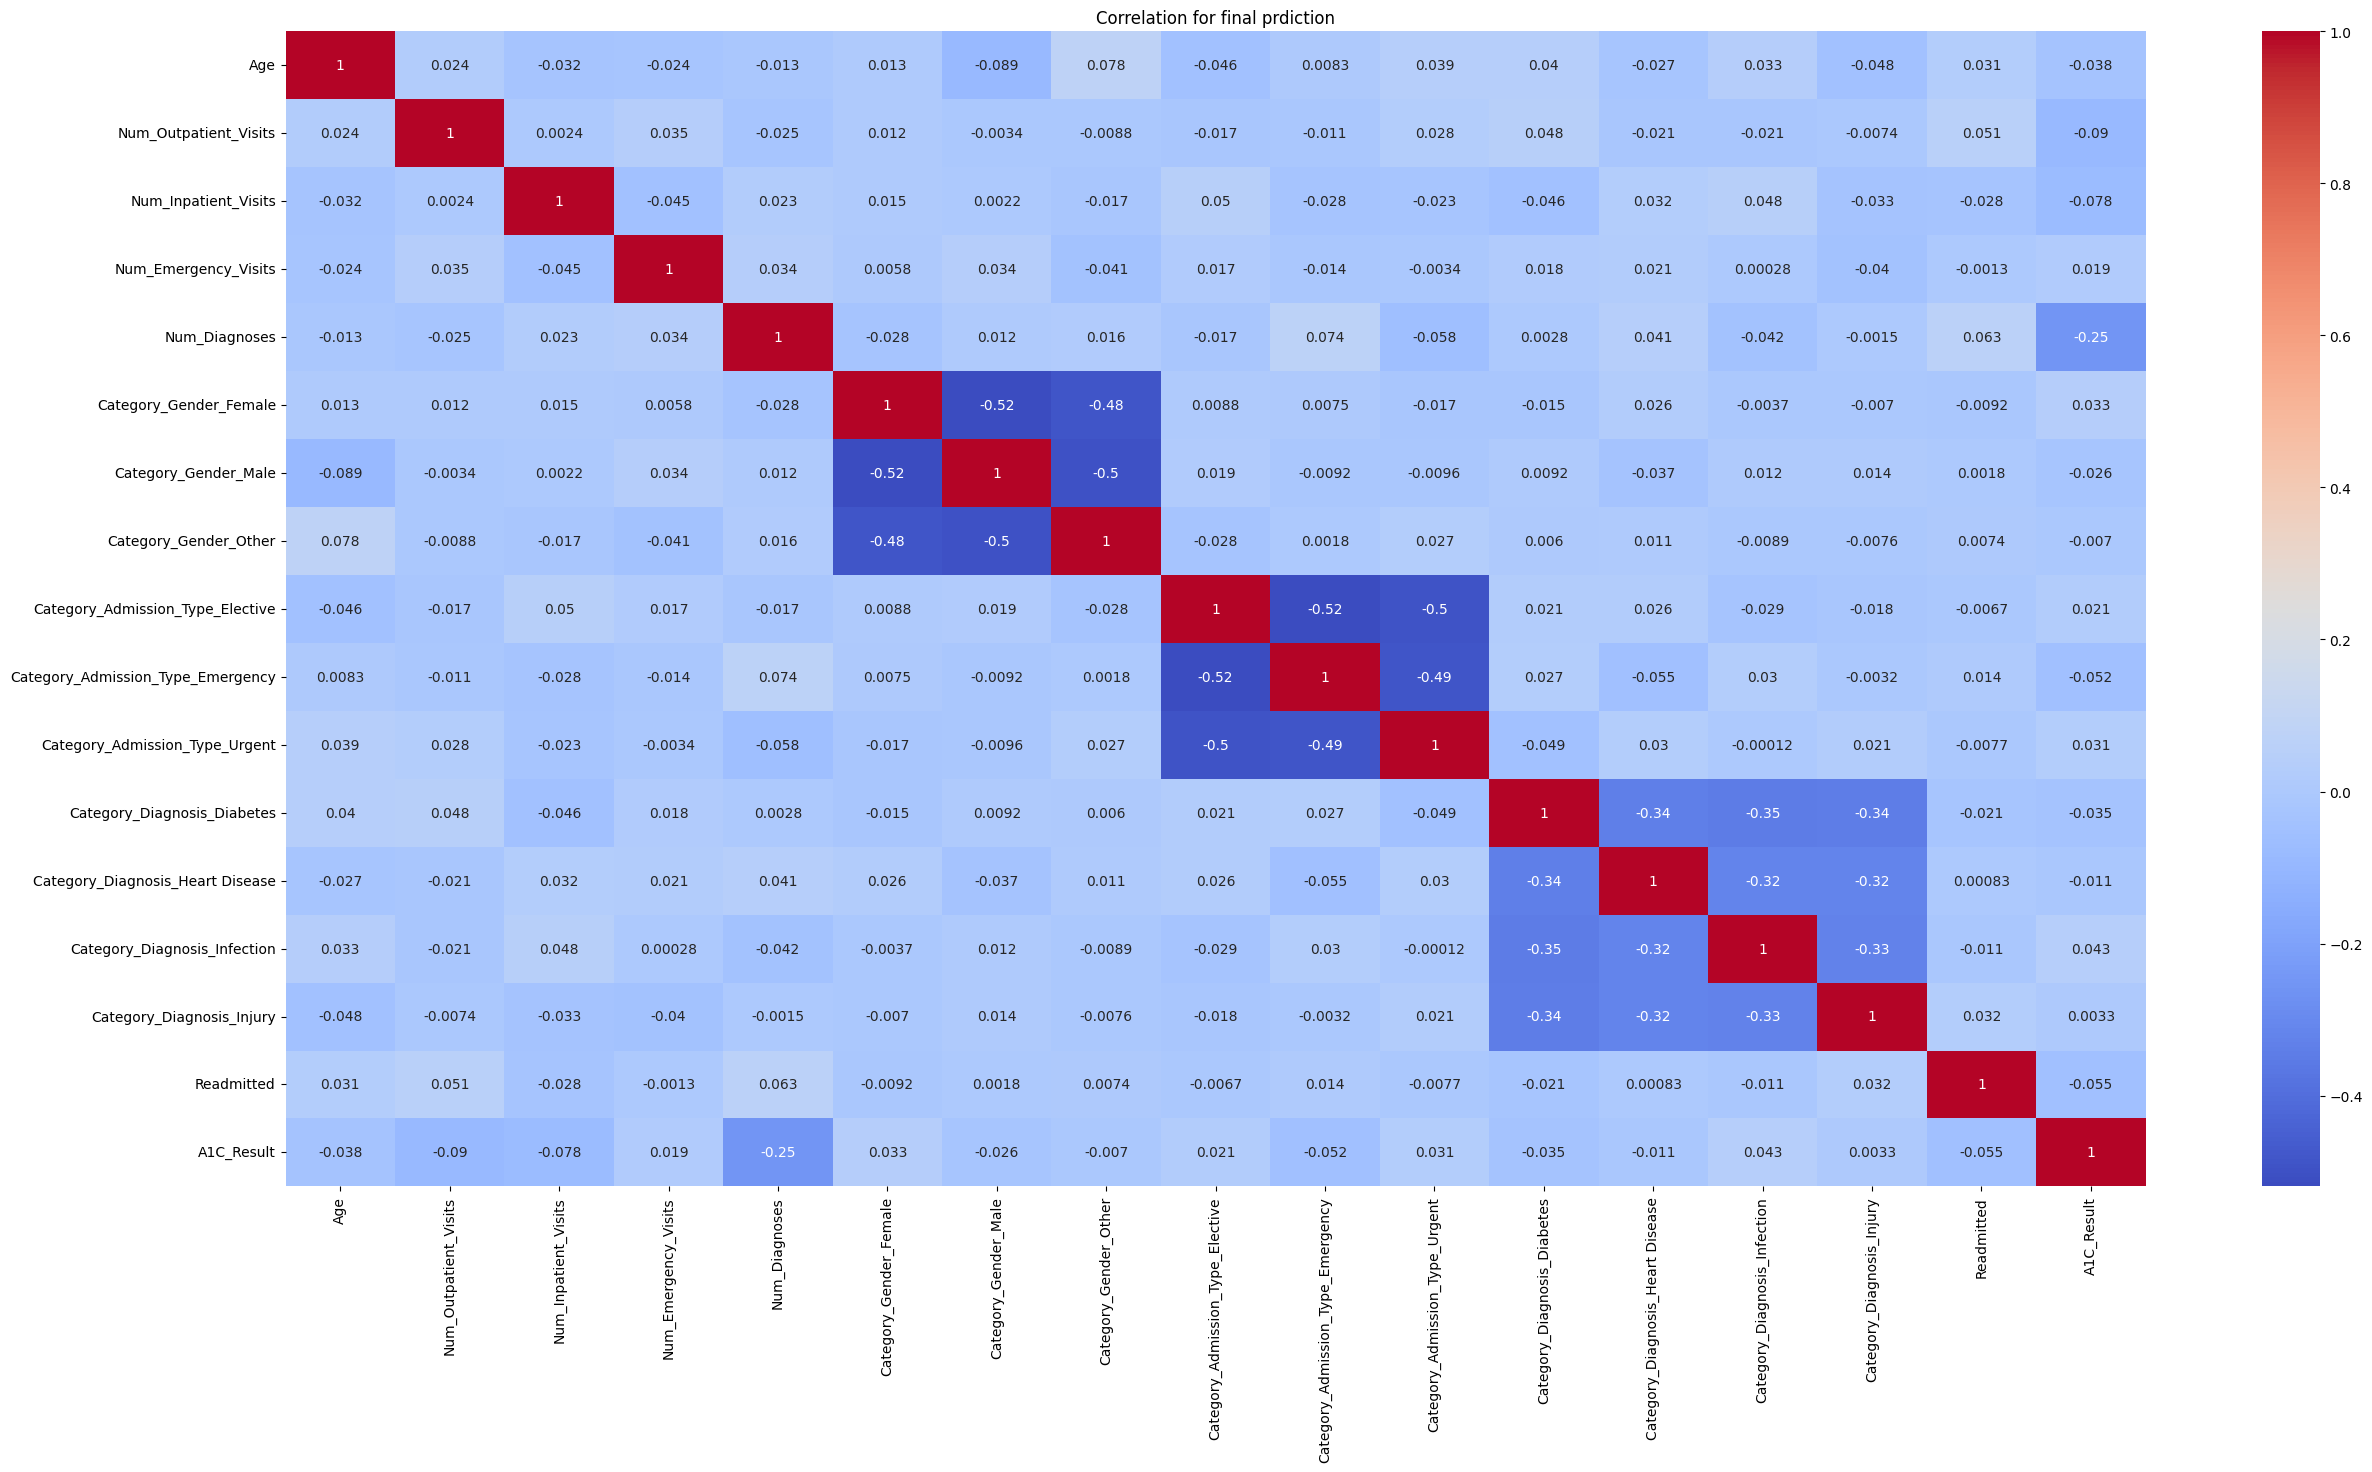

In [435]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full_n' is your DataFrame
corr1 = db_ful_clean.corr()

# Create a figure with a specific size
plt.figure(figsize=(30,15))

# Create a heatmap
sns.heatmap(corr1, cmap='coolwarm', annot=True)

# Set the title
plt.title('Correlation for final prdiction')

# Show the plot
plt.show()

Correlations with Readmitted:
Num_Diagnoses                        0.063308
A1C_Result                           0.054543
Num_Outpatient_Visits                0.050729
Category_Diagnosis_Injury            0.031551
Age                                  0.031254
Num_Inpatient_Visits                 0.028399
Category_Diagnosis_Diabetes          0.021111
Category_Admission_Type_Emergency    0.014365
Category_Diagnosis_Infection         0.010569
Category_Gender_Female               0.009175
Category_Admission_Type_Urgent       0.007727
Category_Gender_Other                0.007444
Category_Admission_Type_Elective     0.006721
Category_Gender_Male                 0.001834
Num_Emergency_Visits                 0.001258
Category_Diagnosis_Heart Disease     0.000832
dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13860\1998707732.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations1, y=sorted_correlations1.index, palette='coolwarm')


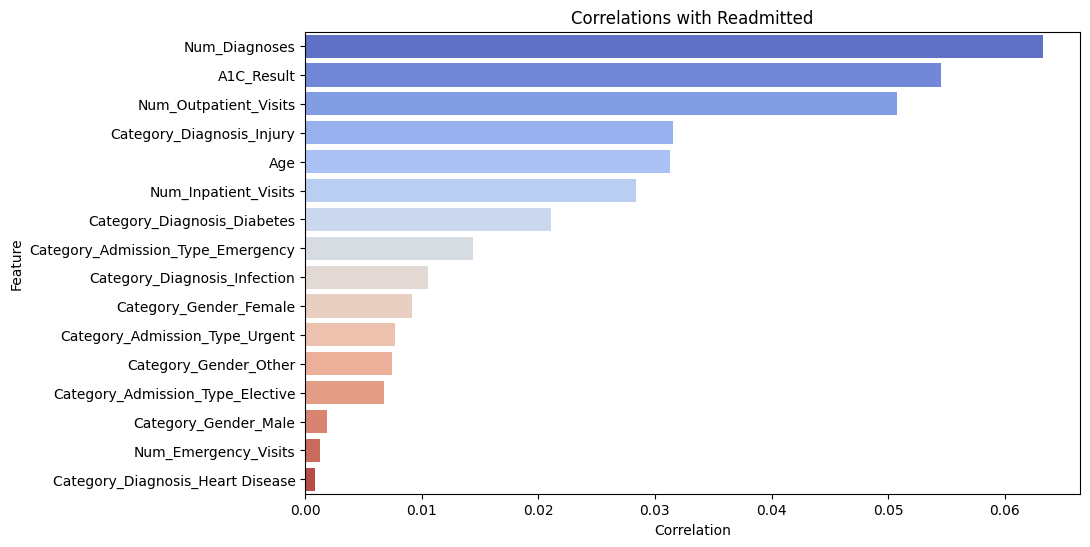

In [436]:
# Assuming your DataFrame is named full_n
# Extract the target variable
target_variable1 = db_ful_clean['Readmitted']

# Calculate the correlation between the target variable and other columns
correlations1 = db_ful_clean.drop(columns=['Readmitted']).corrwith(target_variable1)

# Display the correlations in descending order
sorted_correlations1 = correlations1.abs().sort_values(ascending=False)
print("Correlations with Readmitted:")
print(sorted_correlations1)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations1, y=sorted_correlations1.index, palette='coolwarm')

# Customize the plot
plt.title('Correlations with Readmitted')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

In [437]:
# db_ful_clean1=db_ful_clean
# plt.figure(figsize=(12, 6))

# # Bin the 'Age' column
# db_ful_clean1['Age_Bin'] = pd.cut(db_ful_clean1['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# # Create a bar chart
# sns.countplot(x='Age_Bin', hue='Readmitted', data=db_ful_clean1, palette='viridis')

# plt.title('Distribution of Readmitted Patients by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Count')
# plt.show()



Scaling final

In [438]:
scaler1=MinMaxScaler()
db_ful_clean['Age']=scaler1.fit_transform(db_ful_clean[['Age']])
db_ful_clean['Age']

0      0.772727
1      0.212121
2      0.909091
3      0.303030
4      0.348485
         ...   
995    0.045455
996    0.378788
997    0.863636
998    0.424242
999    0.545455
Name: Age, Length: 990, dtype: float64

In [439]:
# db_ful_clean['Num_Lab_Procedures']=scaler1.fit_transform(db_ful_clean[['Num_Lab_Procedures']])
# db_ful_clean['Num_Lab_Procedures']

In [440]:
# db_ful_clean['Num_Medications']=scaler1.fit_transform(db_ful_clean[['Num_Medications']])
# db_ful_clean['Num_Medications']

final split of data

In [441]:
x1=db_ful_clean.drop(columns=['Readmitted','Category_Diagnosis_Heart Disease',
                              'Category_Gender_Female','Category_Gender_Other',
                              'Category_Gender_Male',],axis=1)
y1=db_ful_clean['Readmitted']
# 'Category_Diagnosis_Infection',,
#                              'Category_Admission_Type_Urgent',,
#                              'Category_Admission_Type_Elective',,,
#                              'Num_Emergency_Visits',

Logistic Regression

In [442]:

x_trainf1, x_testf1, y_trainf1, y_testf1 = train_test_split(x1, y1, test_size=0.1, random_state=13)
modelf1 = LogisticRegression(random_state=13)
modelf1.fit(x_trainf1, y_trainf1)
y_predf1 = modelf1.predict(x_testf1)

accuracyf1 = accuracy_score(y_testf1, y_predf1)
classification_rep6=classification_report(y_testf1, y_predf1)


print("Best Accuracy in LOG_REG:", accuracyf1)
print(f'Classification Report:\n{classification_rep6}')


Best Accuracy in LOG_REG: 0.5050505050505051
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        52
           1       0.48      0.45      0.46        47

    accuracy                           0.51        99
   macro avg       0.50      0.50      0.50        99
weighted avg       0.50      0.51      0.50        99



Decision Tree

In [443]:

x_trainf2,x_testf2,y_trainf2,y_testf2=train_test_split(x1,y1, test_size=0.1,random_state=13)
modelf2=DecisionTreeClassifier(random_state=13)
modelf2.fit(x_trainf2,y_trainf2)
y_predf2=modelf2.predict(x_testf2)

accuracyf2=accuracy_score(y_testf2,y_predf2)
classification_rep7=classification_report(y_testf2,y_predf2)

print("Best Accuracy in DEC_TREE:", accuracyf2)
print(f'Classification Report:\n{classification_rep7}')


Best Accuracy in DEC_TREE: 0.47474747474747475
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        52
           1       0.45      0.51      0.48        47

    accuracy                           0.47        99
   macro avg       0.48      0.48      0.47        99
weighted avg       0.48      0.47      0.47        99



Support Vector Machine

In [444]:

x_trainf3,x_testf3,y_trainf3,y_testf3=train_test_split(x1,y1, test_size=0.3,random_state=13)
modelf3=SVC(random_state=13)
modelf3.fit(x_trainf3,y_trainf3)
y_predf3=modelf3.predict(x_testf3)

accuracyf3=accuracy_score(y_testf3,y_predf3)
classification_rep8=classification_report(y_testf3,y_predf3)

print("Best Accuracy in SVM:", accuracyf3)
print(f'Classification Report:\n{classification_rep8}')




Best Accuracy in SVM: 0.5218855218855218
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       147
           1       0.53      0.49      0.51       150

    accuracy                           0.52       297
   macro avg       0.52      0.52      0.52       297
weighted avg       0.52      0.52      0.52       297



Random Forest

In [445]:

x_trainf4,x_testf4,y_trainf4,y_testf4=train_test_split(x1,y1, test_size=0.3,random_state=13)
modelf4=RandomForestClassifier(random_state=13)
modelf4.fit(x_trainf4,y_trainf4)
y_predf4=modelf4.predict(x_testf4)

accuracyf4=accuracy_score(y_testf4,y_predf4)
classification_rep9=classification_report(y_testf4,y_predf4)

print(" Accuracy in RF:", accuracyf4)
print(f'Classification Report:\n{classification_rep9}')


 Accuracy in RF: 0.47474747474747475
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.55      0.51       147
           1       0.48      0.40      0.43       150

    accuracy                           0.47       297
   macro avg       0.47      0.48      0.47       297
weighted avg       0.47      0.47      0.47       297



KNN

In [446]:

# Assuming x and y are your feature matrix and target variable 13,2

    
# Inner loop for k values
for k_valuef5 in range(1, 21):  # Try k values from 1 to 20
        x_trainf5, x_testf5, y_trainf5, y_testf5 = train_test_split(x1, y1, test_size=0.1, random_state=13)

        # Initialize and train the model
        modelf5 = KNeighborsClassifier(n_neighbors=2)
        modelf5.fit(x_trainf5, y_trainf5)

        # Make predictions on the test set
        y_predf5 = modelf5.predict(x_testf5)

        # Calculate accuracy
        accuracyf5 = accuracy_score(y_testf5, y_predf5)
        classification_rep9=classification_report(y_testf5, y_predf5)



print(f" Accuracy in KNN: {accuracyf5}")
print(f'Classification Report:\n{classification_rep9}')


 Accuracy in KNN: 0.6161616161616161
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.87      0.70        52
           1       0.70      0.34      0.46        47

    accuracy                           0.62        99
   macro avg       0.64      0.60      0.58        99
weighted avg       0.64      0.62      0.59        99



In [447]:
from sklearn.model_selection import GridSearchCV
x_trainf6, x_testf6, y_trainf6, y_testf6 = train_test_split(x1, y1, test_size=0.1, random_state=13)

classifier6 = KNeighborsClassifier(n_neighbors=2)

classifier6.fit(x_trainf6, y_trainf6)

y_pred_val = classifier6.predict(x_testf6)
val_accuracy = accuracy_score(y_testf6, y_pred_val)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)








Validation Accuracy with Best Hyperparameters: 0.6161616161616161


In [448]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_trainf6, x_testf6, y_trainf6, y_testf6 = train_test_split(x1, y1, test_size=0.1, random_state=13)

# Define the parameter grid with correct hyperparameter names
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'p': [1, 2]  #(Manhattan and Euclidean)
}

# Create KNN classifier
classifier6 = KNeighborsClassifier(n_neighbors=2)

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier6, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_trainf6, y_trainf6)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with best hyperparameters on the validation set
best_classifier = grid_search.best_estimator_
y_pred_val = best_classifier.predict(x_testf6)
val_accuracy = accuracy_score(y_testf6, y_pred_val)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)


Best Hyperparameters: {'n_neighbors': 3, 'p': 1}
Validation Accuracy with Best Hyperparameters: 0.5757575757575758
